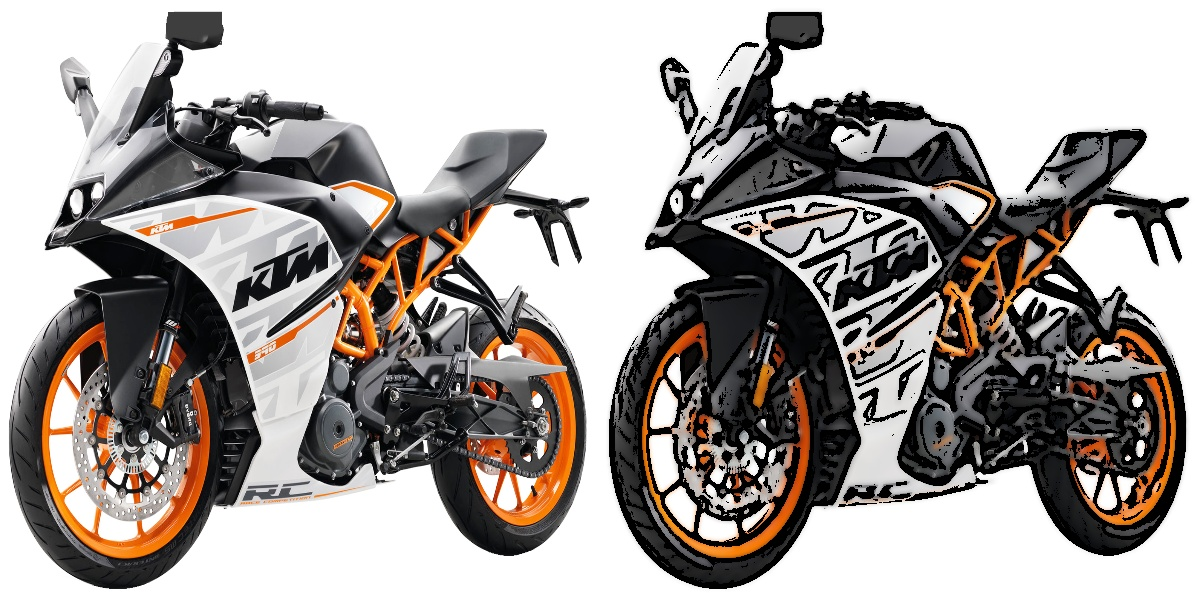

Saved: cartoon_output.jpg


In [4]:
import cv2
import numpy as np

def cartoonify_image(img_path, output_path="cartoon_output.jpg"):
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Image not found at", img_path)
        return

    img = cv2.resize(img, (600, 600))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, 7)
    
    edges = cv2.adaptiveThreshold(
        gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, blockSize=9, C=2
    )
    
    color = cv2.bilateralFilter(img, d=9, sigmaColor=250, sigmaSpace=250)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    
    # Display in Jupyter (alternative to cv2.imshow)
    from IPython.display import display, Image
    combined = np.hstack((img, cartoon))
    _, ret = cv2.imencode('.jpg', combined)
    display(Image(data=ret.tobytes()))
    
    cv2.imwrite(output_path, cartoon)
    print(f"Saved: {output_path}")

# Usage in Jupyter:
cartoonify_image("photo.png")  # Replace with your image path